# Tests on the Mixing Matrix initialization

Check that the scaling laws to give the initial values for the Mixing Matrix entries are correct (MBB for dust and Pl for synch),
by comparing them with the scaling laws of d0 and s0.

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from fgbuster.observation_helpers import get_instrument, standardize_instrument, get_observation
from micmac import *

#### Get some input frequency maps per each component

In [2]:
# General parameters
NSIDE = 64
cmb_model = 'c1'
dust_model = 'd0'
synch_model = 's0'
fgs_model = dust_model+synch_model
model = cmb_model+fgs_model

instr_name = 'LiteBIRD'
# get instrument from public database
instr_ = get_instrument(instr_name)
instrument = standardize_instrument(instr_)

# get input dust
input_dust_maps = get_observation(instrument, dust_model, nside=NSIDE, noise=False)

# get input synch
input_synch_maps = get_observation(instrument, synch_model, nside=NSIDE, noise=False)

# get input cmb
input_cmb_maps = get_observation(instrument, cmb_model, nside=NSIDE, noise=False)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


#### Get Mixing Matrix with initial values from the scaling laws

In [3]:
ncomp = 3
pos_special_freqs = np.array([-1, 0])

initB = InitMixingMatrix(instrument.frequency, ncomp, pos_special_freqs)
init_params = initB.init_params()
init_params

array([[0.00288437, 0.52391889],
       [0.00387988, 0.3117984 ],
       [0.00478088, 0.21981377],
       [0.00605139, 0.15109337],
       [0.00765723, 0.10647904],
       [0.00951436, 0.07902249],
       [0.01344021, 0.05189527],
       [0.01913787, 0.03628152],
       [0.02893752, 0.02616729],
       [0.04512184, 0.02038996],
       [0.08220506, 0.01677506],
       [0.16063955, 0.01570422],
       [0.37618047, 0.01712183]])

#### Plot scaling with frequencies

In [4]:
SED_dust = []
SED_synch = []
SED_cmb = []
for i_f_test, f_test in enumerate(instrument.frequency):
    SED_dust.append(np.average(input_dust_maps[i_f_test][1]))    # SED of average of Q for all pixels
    SED_synch.append(np.average(input_synch_maps[i_f_test][1]))    # SED of average of Q for all pixels
    SED_cmb.append(np.average(input_cmb_maps[i_f_test][1]))    # SED of average of Q for all pixels

In [5]:
freqs_init = np.delete(instrument.frequency, [pos_special_freqs[0], pos_special_freqs[1]])

In [6]:
SED_dust_reduced = np.delete(SED_dust, [pos_special_freqs[0], pos_special_freqs[1]])
SED_synch_reduced = np.delete(SED_synch, [pos_special_freqs[0], pos_special_freqs[1]])

Text(0, 0.5, 'adim')

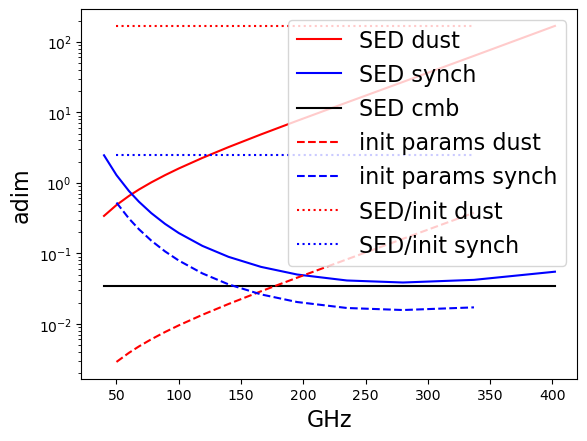

In [7]:
plt.plot(instrument.frequency, SED_dust, 'r', label='SED dust')
plt.plot(instrument.frequency, SED_synch, 'b', label='SED synch')
plt.plot(instrument.frequency, SED_cmb, 'k', label='SED cmb')

plt.plot(freqs_init, init_params[:, 0], 'r--', label='init params dust')
plt.plot(freqs_init, init_params[:, 1], 'b--', label='init params synch')

plt.plot(freqs_init, SED_dust_reduced/init_params[:, 0], 'r:', label='SED/init dust')
plt.plot(freqs_init, SED_synch_reduced/init_params[:, 1], 'b:', label='SED/init synch')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('GHz',fontsize=16)
plt.legend(fontsize=16)
plt.ylabel('adim', fontsize=16)